In [ ]:
!sudo pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.1 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3144472 sha256=aa8a1fbd25576b9a26cfa5d3e786a83076571a226ff3a486aff9ff98f20160ea
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

--2022-05-26 09:44:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G  49.3MB/s    in 91s     

2022-05-26 09:45:56 (47.3 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
!gzip -d cc.en.300.bin.gz

In [ ]:
import fasttext
vectors = fasttext.load_model("cc.en.300.bin")

In [ ]:
vectors.get_word_vector("hate")

array([-2.28898190e-02,  5.07749245e-02,  8.77939016e-02,  8.32091421e-02,
       -1.50226593e-01, -1.55489489e-01, -9.81220156e-02, -1.15755089e-02,
       -1.25264209e-02,  2.36873701e-03,  2.32709348e-02,  1.42633766e-02,
        8.32219571e-02,  9.80092306e-03,  3.55751924e-02,  3.47482562e-02,
        1.32088035e-01,  1.39735848e-01, -1.20466620e-01,  6.70549572e-02,
        5.12775704e-02,  9.48529467e-02, -5.55447750e-02, -4.43520322e-02,
       -1.35414049e-01, -3.21404710e-02, -6.37815222e-02, -1.99137963e-02,
       -1.02364998e-02,  1.14640824e-01, -3.29888687e-02,  8.88931602e-02,
        5.25685307e-03,  1.06687129e-01,  3.15524861e-02, -3.65761593e-02,
        1.39005750e-01,  1.26120567e-01, -7.16997236e-02, -3.28306407e-02,
       -1.39969476e-02, -5.11801541e-02,  1.89910959e-02, -1.07423170e-02,
        6.58825040e-04,  4.00510244e-03,  2.59701665e-02,  2.15283856e-01,
        6.24928400e-02, -2.05698907e-02, -5.53979725e-03,  1.12893656e-02,
        6.15104800e-03, -

In [ ]:
vectors.get_word_vector("hate").shape

(300,)

In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
df=pd.read_csv('Reviews.csv',index_col='Id')

In [ ]:
pos_rev=df[df['Score']>3]
neg_rev=df[df['Score']<3]

In [ ]:
len(pos_rev), len(neg_rev)

(15406, 2944)

In [ ]:
def preprocess(sentence):
    result=[]
    sentence = sentence.lower()
    sentence = sentence.replace("<br />", " ").replace("<a ", " ").replace("</a>", " ")
    sentence = sentence.replace("?", " ?").replace("!", " !")
    tokens = sentence.split()
    for token in tokens:
        token = token.strip(",;.-<>()[]")
        result.append(token)
    return " ".join(result)

In [ ]:
pos_revs=[]
for sent in pos_rev['Text']:
  sent = preprocess(sent)
  pos_revs.append(sent)

neg_revs=[]
for sent in neg_rev['Text']:
  sent = preprocess(sent)
  neg_revs.append(sent)


In [ ]:
pos_revs[0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE

In [ ]:
embed_size=300

In [ ]:
dataPos=[]
for sentence in pos_revs:
  words = sentence.split()
  vecs = []
  for word in words:
    vec = vectors.get_word_vector(word)
    if vec is not None:
      vecs.append(vec)
  dataPos.append(vecs)

In [ ]:
classes = [1] * len(pos_revs) + [0] *  len(neg_revs)

In [ ]:
dataNeg=[]
for sentence in neg_revs:
  words = sentence.split()
  vecs = []
  for word in words:
    vec = vectors.get_word_vector(word)
    if vec is not None:
      vecs.append(vec)
  dataNeg.append(vecs)

In [ ]:
dataAll = dataPos + dataNeg

In [ ]:
len(dataAll), len(dataAll[0]), len(dataAll[1])

(18350, 48, 92)

In [ ]:
dataAvg=[]
for xx in dataAll:
    row = np.mean(xx, axis=0)
    dataAvg.append(row)

In [ ]:
dataAvg[0].shape

(300,)

In [ ]:
tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=250, random_state=23)
new_values = tsne_model.fit_transform(dataAvg)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [ ]:
fc = []
sc = []
tc = []
for value in dataAvg:
  fc.append(value[0])
  sc.append(value[1])
  tc.append(value[2])

In [ ]:
pr, nr  =len(pos_revs), len(neg_revs)
pr, nr

(15406, 2944)

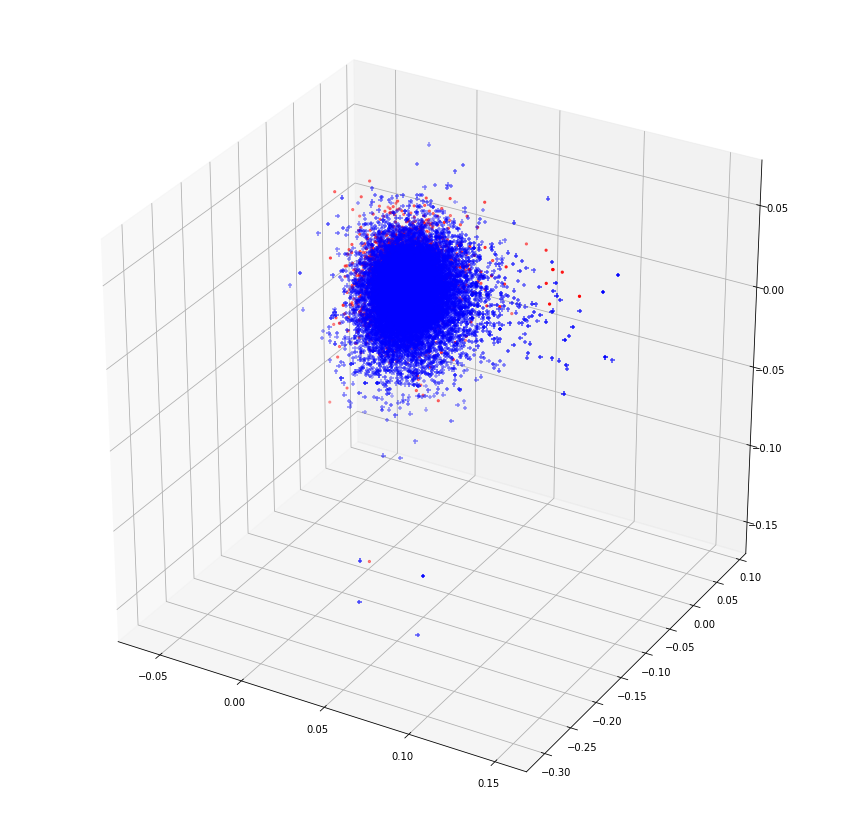

In [ ]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fc[:pr], sc[:pr], tc[:pr], color="b", marker="+")

ax.scatter(fc[pr:], sc[pr:], tc[pr:], color="r", marker=".")

In [ ]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
new_values = tsne_model.fit_transform(dataAvg)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
fc = []
sc = []
for value in dataAvg:
  fc.append(value[0])
  sc.append(value[1])

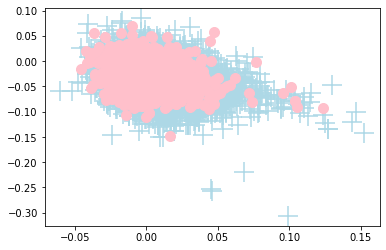

In [ ]:
plt.scatter(fc[:pr], sc[:pr], color="lightblue", marker="+", s=400)

plt.scatter(fc[pr:], sc[pr:], color="pink", marker=".", s=400)
plt.show()